In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn.cross_decomposition import PLSRegression
from sklearn.feature_selection import chi2

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

import math

from IPython.display import Markdown as md

from nycschools import schools, ui, exams

In [2]:
# load the demographic data and merge it with the math data
demographics = schools.load_school_demographics()

math_df = exams.load_math()
ela_df = exams.load_ela()

def dataframeconstructor(df1,df2): #makes dataframe for combining demographics and test score data
    
    merged = df1.merge(df2, how = 'inner', on = ['dbn','ay']) #merges the two files based on school ID and year data was collected
    merged = merged[merged["mean_scale_score"].notnull()] #cleans null values from dataframe
    return merged
'''
mathscores_df = df.merge(math_df, how="inner", on=["dbn", "ay"])
mathscores_df = mathscores_df[mathscores_df["mean_scale_score"].notnull()]
'''

math = dataframeconstructor(demographics,math_df)
ela = dataframeconstructor(demographics,ela_df)


#math2019 = math.loc[math['ay'] == 2017]
#math2019.shape
#math2019.corrwith(math2019['mean_scale_score']).sort_values()

In [3]:

    
    

    def analysis(dfchoice,year):
        
        #dfchoice = input ('Would you like to view correlation data for Mathematics state test scores or ELA state test scores for your specified year? ').upper()
        #year = int(input('Enter the year you would like to analyze '))
    
        if (year == 2016 or year == 2017 or year == 2018) & (dfchoice.upper() == 'MATHEMATICS'):

            attribute = input('Enter the attribute you would like to analyze ')
            math_corr = math.loc[math['ay'] == (year)]
            math_corrwith = math_corr.corrwith(math_corr[attribute]).sort_values()
            
            #return(math_corr)
            
            print(math_corrwith)
            
            plot = input('What kind of plot would you like to make? ')
            
            
            if plot == 'scatterplot':
                xaxis = input('Enter the variable you would like for the x axis ')
                yaxis = input('What attribute would you like for your y axis ')
                sns.scatterplot(data= math_corr, x=xaxis, y=yaxis)
            #return corr
            
            elif plot == 'histogram':
                xaxis = input('Enter the variable you would like for the x axis ')
                sns.histplot(data = math_corr, x = xaxis)
                
            else:
                print('this option is not supported')

        elif (year == 2016 or year == 2017 or year == 2018) & (dfchoice.upper() == 'ELA'):
            attribute = input('Enter the attribute you would like to analyze ')
            ela_corr = ela.loc[ela['ay'] == (year)]
            ela_corrwith = ela_corr.corrwith(ela_corr[attribute]).sort_values()
            
            #return(ela_corr)
            print(ela_corrwith)
            
            plot = input('What kind of plot would you like to make? ')
            
            
            if plot == 'scatterplot':
                xaxis = input('Enter the variable you would like for the x axis ')
                yaxis = input('What attribute would you like for your y axis ')
                sns.scatterplot(data= ela_corr, x=xaxis, y=yaxis)
            #return corr
            
            elif plot == 'histogram':
                xaxis = input('Enter the variable you would like for the x axis ')
                sns.histplot(data = ela_corr, x = xaxis)
            #return corr
            
            else:
                print('this option is not supported')
    
        else:
            print ('this data does not exist in our current dataset')
        #math2019.shape



Enter the attribute you would like to analyze eni_pct
white_pct                         -0.800020
multi_racial_pct                  -0.686306
multi_racial_n                    -0.681598
white_n                           -0.669338
mean_scale_score                  -0.558228
level_3_4_pct                     -0.554309
level_4_pct                       -0.553931
level_4_n                         -0.254244
level_3_pct                       -0.247414
asian_pct                         -0.245964
level_3_4_n                       -0.207390
female_n                          -0.180818
missing_race_ethnicity_data_n     -0.176395
asian_n                           -0.173890
missing_race_ethnicity_data_pct   -0.173364
total_enrollment                  -0.168060
grade_k                           -0.160096
beds                              -0.157765
male_n                            -0.151461
grade_1                           -0.127494
grade_2                           -0.118296
geo_district          

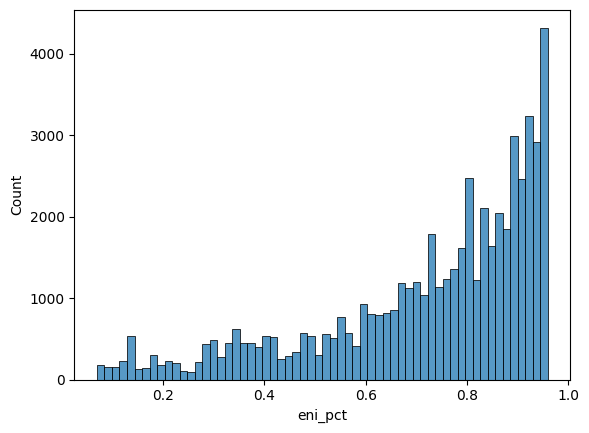

In [4]:
analysis('mathematics',2018)


In [150]:
math['ay'].value_counts()

2018    55620
2016    54914
2017    54796
Name: ay, dtype: int64

In [ ]:
#also looking at poverty metrics compared to geo district, "tag" the districts by poverty level and analyse
#district vs test score. Also look at poverty level and grade vs test score; see how poverty level
#affects children of different ages
#optional: find schools that have either low poverty and low scores or high poverty and high scores and 
#analyse factors of those schools to find what sets them apart



In [ ]:
#ideas for analysis: finding correlation of test scores to total enrollment, etc.

Enter the attribute you would like to analyze level_1_pct
mean_scale_score                  -0.908530
level_3_4_pct                     -0.897745
level_4_pct                       -0.753308
level_3_pct                       -0.664324
white_pct                         -0.418044
white_n                           -0.364840
asian_pct                         -0.359353
level_4_n                         -0.348727
multi_racial_n                    -0.334525
level_3_4_n                       -0.327373
multi_racial_pct                  -0.320406
asian_n                           -0.300855
grade_k                           -0.291344
grade_1                           -0.280565
grade_2                           -0.270228
grade_3                           -0.252795
level_3_n                         -0.248380
grade_4                           -0.241981
grade_5                           -0.237407
female_n                          -0.229021
total_enrollment                  -0.215431
male_n            

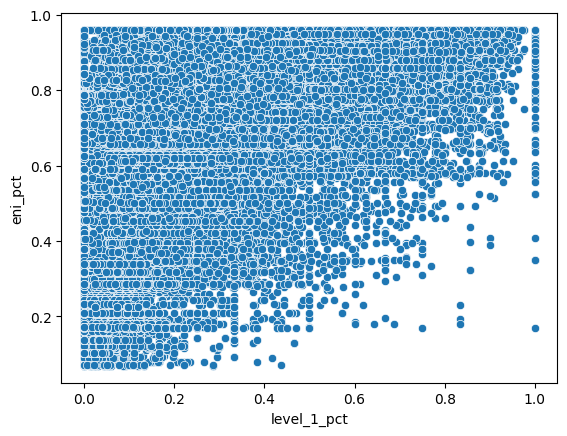

In [10]:
#finding factors that are correlated to low test scores (level_1_pct)
#scatterplot

#we will be analysing the most recent year and the oldest year we have access to for mathematics and ELA, amongst all grades
analysis('mathematics',2018)

In [ ]:
#we found that eni_pct and level_1_pct are decently correlated
#although the scatterplot is noisy, it shows us that higher levels of low test scores
#are mainly correlated with higher levels of economic needs

Enter the attribute you would like to analyze level_1_pct
mean_scale_score                  -0.868529
level_3_4_pct                     -0.855358
level_3_pct                       -0.717932
level_4_pct                       -0.566813
white_pct                         -0.354524
white_n                           -0.297740
multi_racial_pct                  -0.295119
multi_racial_n                    -0.291415
level_3_4_n                       -0.280810
level_3_n                         -0.268018
level_4_n                         -0.255763
asian_pct                         -0.245449
asian_n                           -0.192516
grade_k                           -0.146634
female_n                          -0.146348
grade_1                           -0.133815
total_enrollment                  -0.127804
grade_2                           -0.127358
female_pct                        -0.124729
missing_race_ethnicity_data_pct   -0.117957
missing_race_ethnicity_data_n     -0.113475
grade_3           

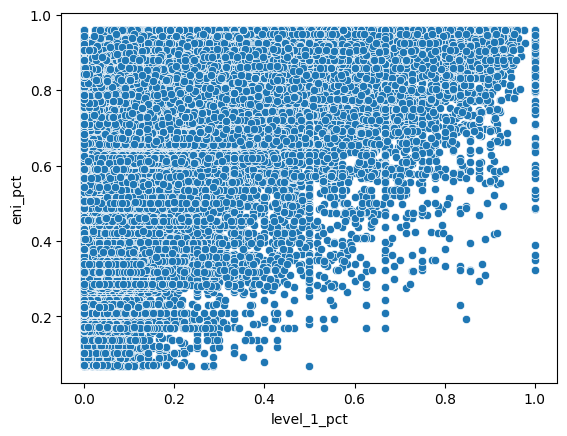

In [11]:
#same analysis but for ELA

analysis('ela',2018)

In [ ]:
#we observe a similar relationship with ELA test results across all grades

Enter the attribute you would like to analyze level_4_pct
level_1_pct                       -0.753308
level_2_pct                       -0.562858
eni_pct                           -0.553931
poverty_pct                       -0.549692
swd_pct                           -0.436586
hispanic_pct                      -0.351055
black_pct                         -0.348298
level_1_n                         -0.265572
black_n                           -0.237676
ell_pct                           -0.156067
hispanic_n                        -0.148311
male_pct                          -0.088441
level_2_n                         -0.084188
native_american_pct               -0.054973
poverty_n                         -0.048840
swd_n                             -0.032117
grade_8                           -0.022211
grade_7                           -0.012419
native_american_n                 -0.002497
grade_6                            0.001436
ell_n                              0.002237
grade_12          

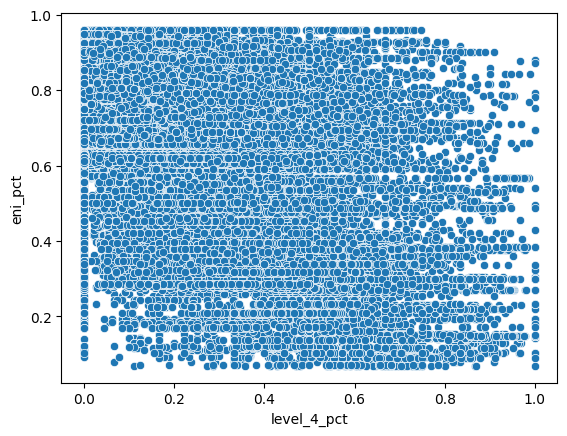

In [13]:
#finding factors correlated to high test scores (level_4_pct)

analysis('mathematics', 2018)

In [ ]:
#although we find that the correlation between economic need and high test scores are decently correlated
#the noise in the scatterplot prevents us from fully seeing this result
#we can, however, see that the higher test scores have slightly lower instances of economic need

Enter the attribute you would like to analyze level_4_pct
level_1_pct                       -0.566813
level_2_pct                       -0.562009
eni_pct                           -0.550753
poverty_pct                       -0.548888
swd_pct                           -0.376561
hispanic_pct                      -0.327034
ell_pct                           -0.283672
black_pct                         -0.256861
level_1_n                         -0.173496
black_n                           -0.156031
hispanic_n                        -0.149678
male_pct                          -0.144937
ell_n                             -0.131119
grade_3k_pk_half_day_full         -0.117778
poverty_n                         -0.091280
native_american_pct               -0.057103
level_2_n                         -0.040744
zip                               -0.038313
grade_4                           -0.037418
grade_3                           -0.036070
grade_5                           -0.034505
swd_n             

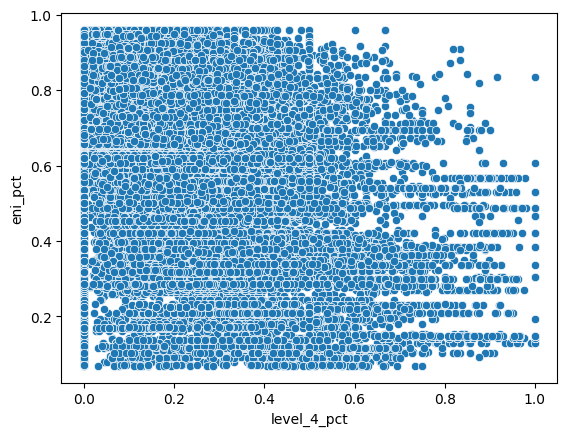

In [14]:
analysis('ela',2018)

In [ ]:
#here we more clearly see that schools with higher levels of high test scores have lower levels of economic need

In [ ]:
#finally, we take a look at the correlations and distribution of economic need amongst schools in the school system

Enter the attribute you would like to analyze eni_pct
white_pct                         -0.800020
multi_racial_pct                  -0.686306
multi_racial_n                    -0.681598
white_n                           -0.669338
mean_scale_score                  -0.558228
level_3_4_pct                     -0.554309
level_4_pct                       -0.553931
level_4_n                         -0.254244
level_3_pct                       -0.247414
asian_pct                         -0.245964
level_3_4_n                       -0.207390
female_n                          -0.180818
missing_race_ethnicity_data_n     -0.176395
asian_n                           -0.173890
missing_race_ethnicity_data_pct   -0.173364
total_enrollment                  -0.168060
grade_k                           -0.160096
beds                              -0.157765
male_n                            -0.151461
grade_1                           -0.127494
grade_2                           -0.118296
geo_district          

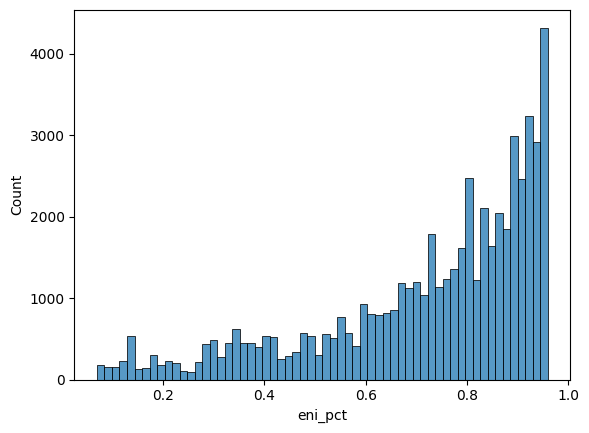

In [15]:
analysis('mathematics', 2018)

Enter the attribute you would like to analyze eni_pct
white_pct                         -0.800135
multi_racial_pct                  -0.684238
multi_racial_n                    -0.678063
white_n                           -0.669192
mean_scale_score                  -0.579806
level_3_4_pct                     -0.569913
level_4_pct                       -0.550753
level_3_pct                       -0.286484
level_4_n                         -0.258145
asian_pct                         -0.245112
level_3_4_n                       -0.210402
missing_race_ethnicity_data_n     -0.185579
missing_race_ethnicity_data_pct   -0.183915
female_n                          -0.180280
asian_n                           -0.172902
total_enrollment                  -0.166549
beds                              -0.154757
grade_k                           -0.149568
male_n                            -0.148628
level_3_n                         -0.124121
grade_1                           -0.117593
geo_district          

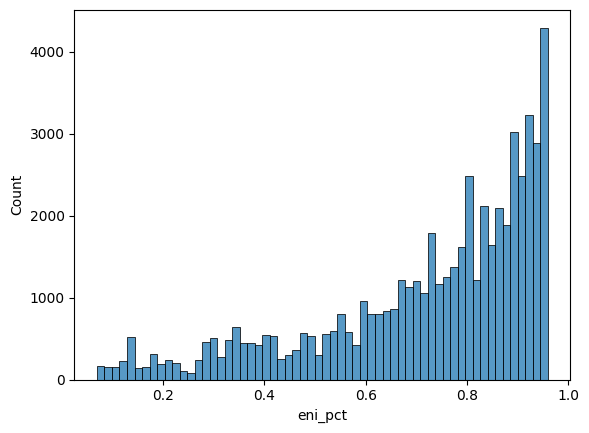

In [16]:
analysis('ela',2018)

In [ ]:
#we see similar results where 